#### Customer churn(loss) prediction using  ANN ####

In this tutorial you will solve classification problem where in we have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [3]:
pip install tensorflow

In [4]:
import numpy as np
import pandas as pd

from tensorflow.keras import Sequential
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
import seaborn as sns
%matplotlib inline

#for Interactive skill
from IPython.display import display

#removing warning
import sys 
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [5]:
import tensorflow

In [6]:
print(tensorflow.__version__)

2.18.0


#### **Import Dataset** ####

In [8]:
df = pd.read_csv(r"C:\Users\lenovo\Downloads\Churn_Modelling.csv", index_col='RowNumber')
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [10]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
#some columns are totally unproductive so let's remove them

df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

In [13]:
#some column have text data so let's one hot encode them
#for more on one hot encoding click this link below

df = pd.get_dummies(prefix='Geo', data=df, columns=['Geography'])

In [14]:
df.shape

(10000, 13)

In [15]:
df = df.replace(to_replace={'Gender': {'Female': 1, 'Male':0}})

In [16]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,True,False,False
2,608,1,41,1,83807.86,1,0,1,112542.58,0,False,False,True
3,502,1,42,8,159660.80,3,1,0,113931.57,1,True,False,False
4,699,1,39,1,0.00,2,0,0,93826.63,0,True,False,False
5,850,1,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [17]:
df.shape

(10000, 13)

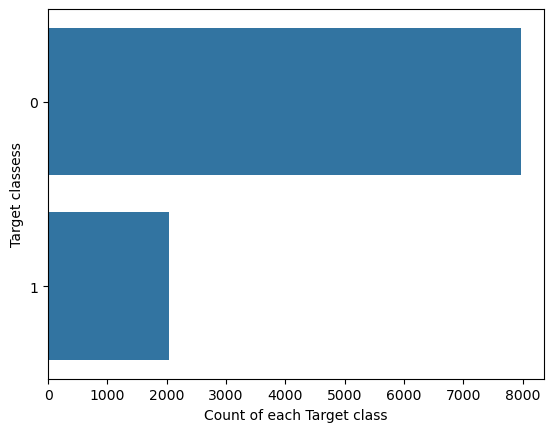

In [18]:
sns.countplot(y=df.Exited, data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classess")
plt.show()

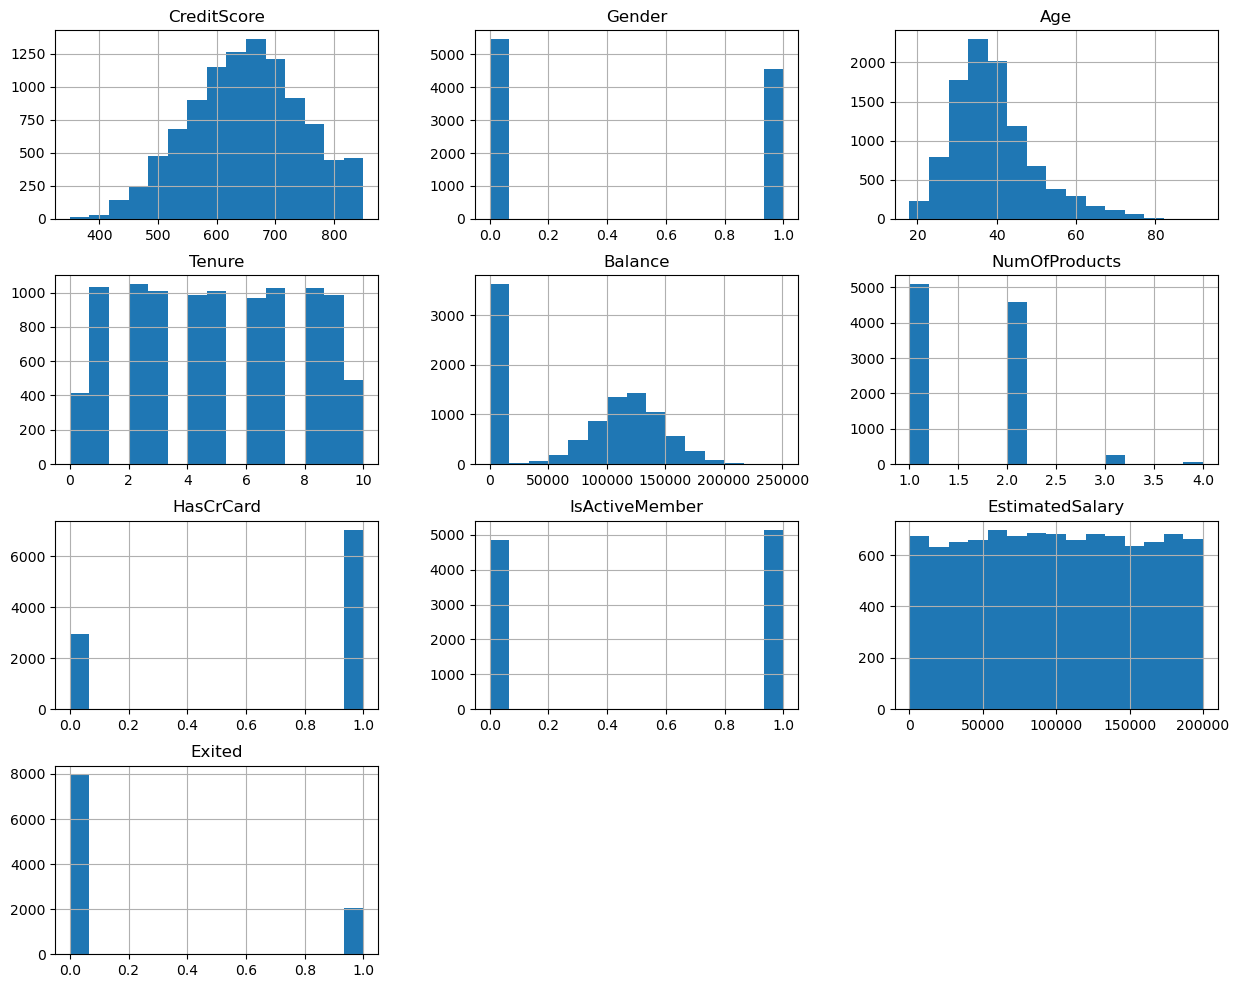

In [19]:
df.hist(figsize=(15,12), bins=15)
plt.title("Features Distribution")
plt.show()

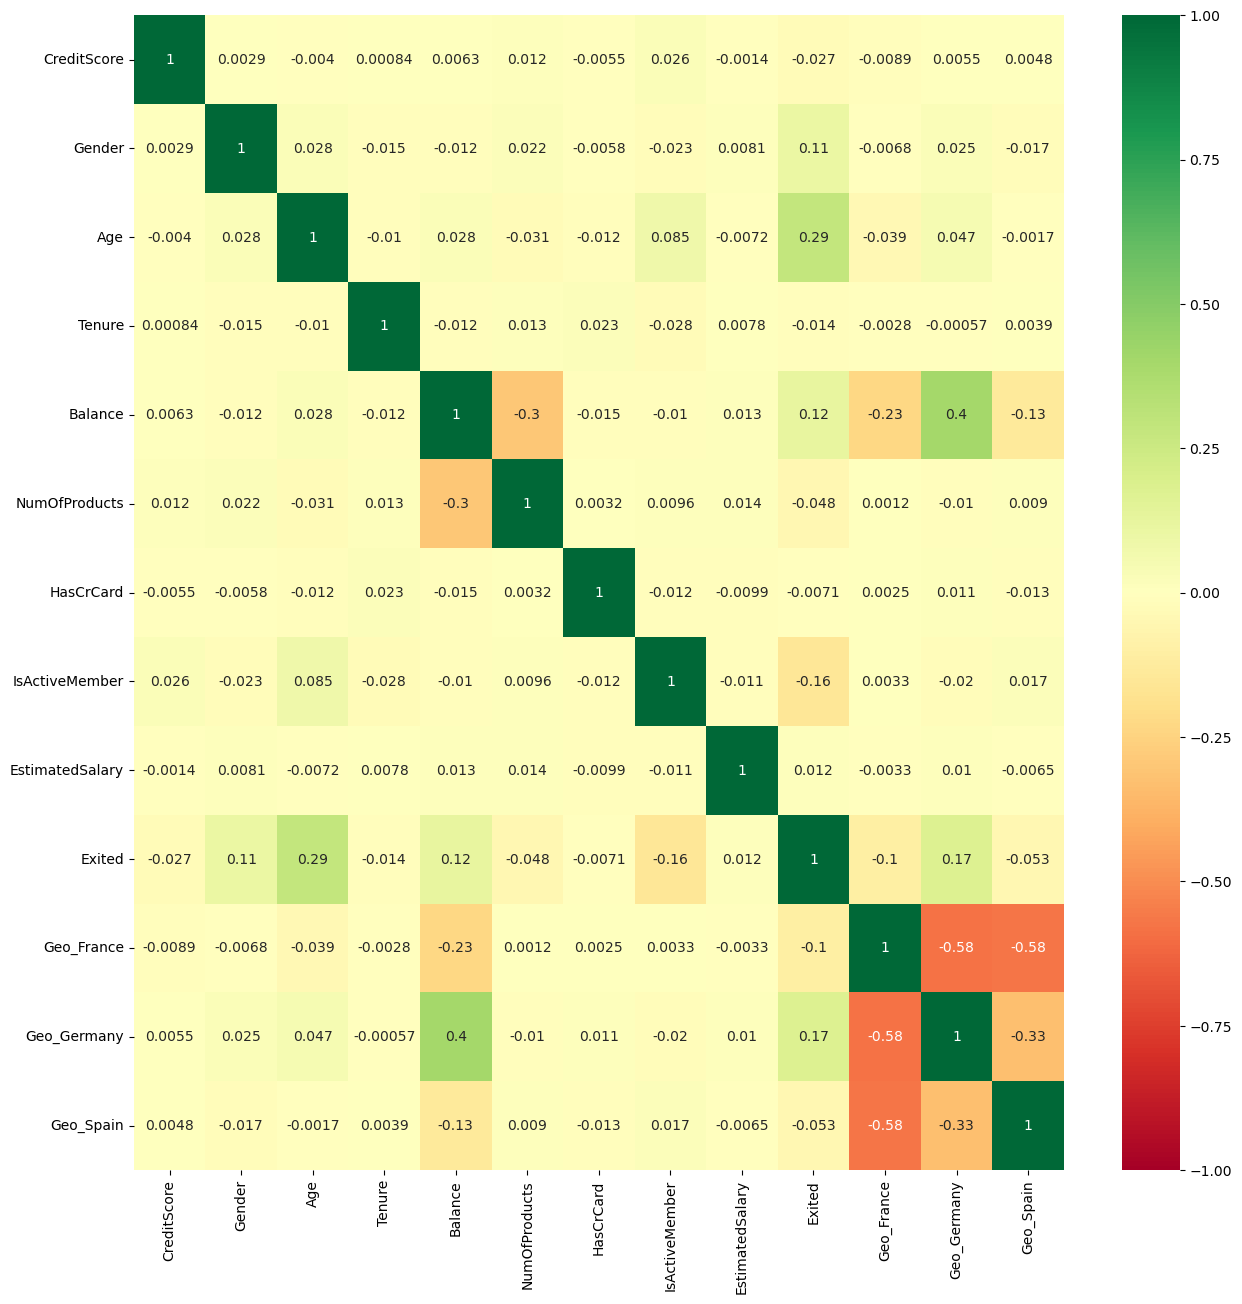

In [20]:
plt.figure(figsize=(15,15))
p = sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', center=0, vmax=1.0, vmin=-1.0)

In [21]:
y = df.Exited
X = df.drop(['Exited'], axis = 1)

In [22]:
#splitting the data into train and test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression
#create a model
lr=LogisticRegression()

In [25]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [26]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [28]:
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))
accuracy_score(y_pred, y_test)

[[2511  529]
 [ 106  154]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      3040
           1       0.23      0.59      0.33       260

    accuracy                           0.81      3300
   macro avg       0.59      0.71      0.61      3300
weighted avg       0.90      0.81      0.84      3300



0.8075757575757576

**Model Building**

In [30]:
#sequential model to initialise our ANN and dense module to build the layers

model = Sequential()

#Adding the input layer and the firt hidden layer

model.add(Dense(units = 190, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))

#Adding the second hidden layer 
model.add(Dense(units = 130, kernel_initializer = 'uniform', activation='relu'))

#Adding the third hidden layer 
model.add(Dense(units = 120, kernel_initializer = 'uniform', activation='relu'))

#Adding the third hidden layer 
model.add(Dense(units = 140, kernel_initializer = 'uniform', activation='relu'))

#Adding the output layer
model.add(Dense(units = 1, kernel_initializer='uniform', activation='sigmoid'))   #out data has binary classification hence in output there is only one preceptron.

In [31]:
#Compiling the ANN | means applying SGD on the whole ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 190)                 │           2,470 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 130)                 │          24,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 120)                 │          15,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 140)                 │          16,940 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             141 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,101 (234.77 KB)

 Trainable params: 60,101 (234.77 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
#Fitting the ANN to the trainig set

EPOCHS = 20
BATCH_SIZE = 128

#train_model
H = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs= EPOCHS, validation_split=0.2, verbose = 1)

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.7397 - loss: 0.6201 - val_accuracy: 0.8000 - val_loss: 0.4355
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7979 - loss: 0.4260 - val_accuracy: 0.8000 - val_loss: 0.4215
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7987 - loss: 0.4237 - val_accuracy: 0.8000 - val_loss: 0.4089
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8158 - loss: 0.4029 - val_accuracy: 0.8463 - val_loss: 0.3772
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8537 - loss: 0.3647 - val_accuracy: 0.8582 - val_loss: 0.3622
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8591 - loss: 0.3525 - val_accuracy: 0.8604 - val_loss: 0.3454
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8602 - loss: 0.3454 - val_accuracy: 0.8627 - val_loss: 0.3466
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8687 - loss: 0.3343 - val_accuracy: 0.8619 - val_

In [34]:
H.history

{'accuracy': [0.7843283414840698,
  0.7973880767822266,
  0.7973880767822266,
  0.8335821032524109,
  0.8550373315811157,
  0.8602612018585205,
  0.8600746393203735,
  0.8656716346740723,
  0.8677238821983337,
  0.8656716346740723,
  0.8701492547988892,
  0.8669776320457458,
  0.8662313222885132,
  0.8667910695075989,
  0.8718283772468567,
  0.8733208775520325,
  0.8731343150138855,
  0.875186562538147,
  0.8768656849861145,
  0.8764925599098206],
 'loss': [0.5389779806137085,
  0.43058088421821594,
  0.42125290632247925,
  0.3955925703048706,
  0.362524151802063,
  0.3468203842639923,
  0.34344497323036194,
  0.3366434872150421,
  0.33213213086128235,
  0.32977432012557983,
  0.3286580443382263,
  0.3284803032875061,
  0.3244158923625946,
  0.319934219121933,
  0.31698155403137207,
  0.3157798945903778,
  0.31333252787590027,
  0.30913105607032776,
  0.30677172541618347,
  0.3011876344680786],
 'val_accuracy': [0.800000011920929,
  0.800000011920929,
  0.800000011920929,
  0.846268653

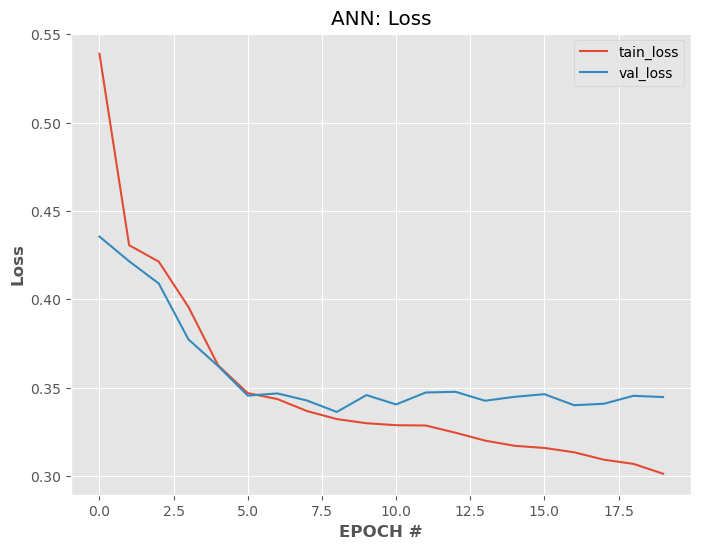

In [35]:
#plot the training and validation loss

N = np.arange(0,EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [8,6])
plt.plot(N, H.history["loss"], label="tain_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("ANN: Loss")
plt.xlabel("EPOCH #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

*As per above graph, we still have the loss 0.35, hence we need to reduce the loss so that it is close to 0. We will run the model for 10 more EPOCHS.*

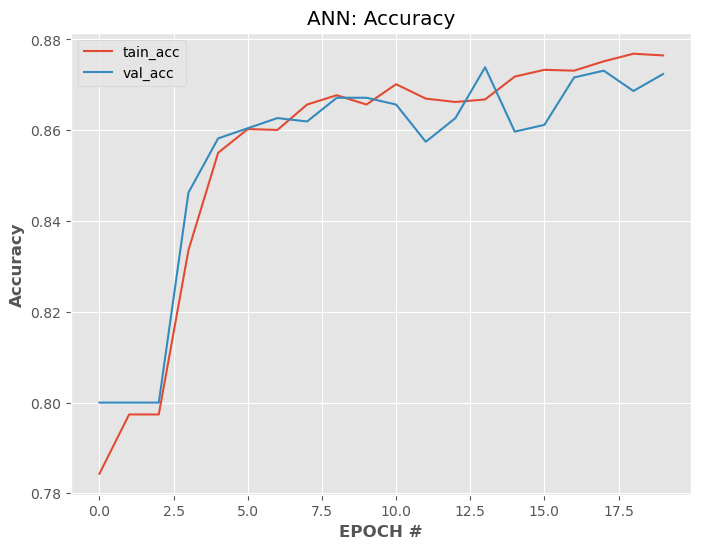

In [37]:
#plot the training and validation accuracy

N = np.arange(0,EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [8,6])
plt.plot(N, H.history["accuracy"], label="tain_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("ANN: Accuracy")
plt.xlabel("EPOCH #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

In [38]:
#part 3 - Makingprediction and evaluating the model

#Predicting the Test Set reults


y_pred = model.predict(X_test)

y_pred = (y_pred > 0.5)

print('*'*20)
loss, acc = model.evaluate(X_test, y_test, batch_size=10)

print('Test Loss:', loss)
print('Test Accuraccy:', acc)

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
********************
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8626 - loss: 0.3410
Test Loss: 0.34925222396850586
Test Accuraccy: 0.8569697141647339


In [39]:
#Making the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 23.52222222222222, 'Predicted label')

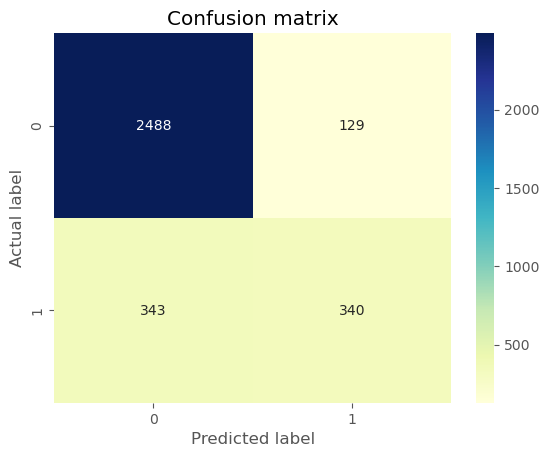

In [40]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap='YlGnBu', fmt='g')
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [41]:
#import classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2617
           1       0.72      0.50      0.59       683

    accuracy                           0.86      3300
   macro avg       0.80      0.72      0.75      3300
weighted avg       0.85      0.86      0.85      3300



104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


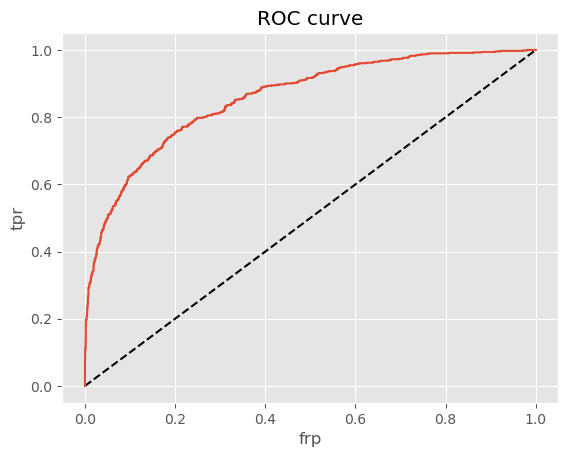

In [42]:
from sklearn.metrics import roc_curve
y_pred_proba = model.predict(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label = 'ANN')
plt.xlabel('frp')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [43]:
#Area under ROC Curve

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

0.8582281859068788

### Drop Out Layer ###

Dropout regularization is used to rreduce overfitting if needed. 

p is fraction of input units to drop. If suppose there are 10 neurons fram a layer and p is 0.1 then one of the neurons would be disbaled and output would not be sent to the further layer.  

It is advisable to start with p 0.1 and move to higher values when in case the overfitting problem persists. Also going over 0.5 is not advisable generally because it may cause underfitting as most of the neurons are disabled.

In [98]:
# Improving the ANN
from tensorflow.keras.layers import Dropout
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, 
                     kernel_initializer = 'uniform', 
                     activation = 'relu', 
                     input_dim = 12))
classifier.add(Dropout(rate = 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.1))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 64, epochs = 50,verbose = 1)

Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7802 - loss: 0.6824
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8030 - loss: 0.5746
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8058 - loss: 0.4519
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8045 - loss: 0.4372
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7990 - loss: 0.4352
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7930 - loss: 0.4362
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7976 - loss: 0.4409
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8034 - loss: 0.4292
Epoch 9/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8039 - loss: 0.4289
Epoch 10/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8007 - loss: 0.4408
Epoch 11/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7999 - loss: 0.4344
Epoch 12/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

In [100]:
# Part 3 - Making predictions and evaluating the model
score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

670/670 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8260 - loss: 0.4107
Train score: 0.4118399918079376
Train accuracy: 0.8279104232788086
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
********************
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8341 - loss: 0.4082
Test score: 0.4182334542274475
Test accuracy: 0.8306060433387756


Text(0.5, 23.52222222222222, 'Predicted label')

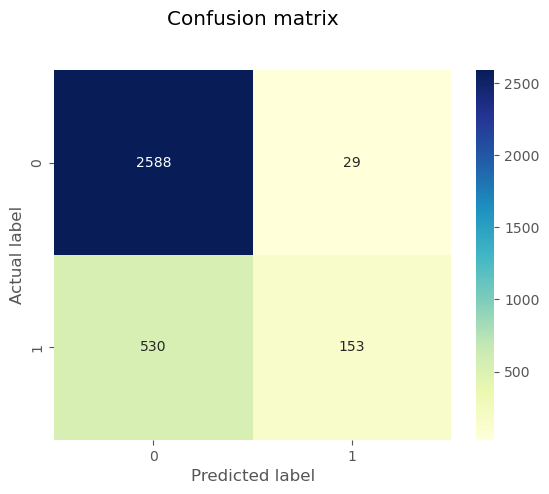

In [102]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [108]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2617
           1       0.84      0.22      0.35       683

    accuracy                           0.83      3300
   macro avg       0.84      0.61      0.63      3300
weighted avg       0.83      0.83      0.79      3300



104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


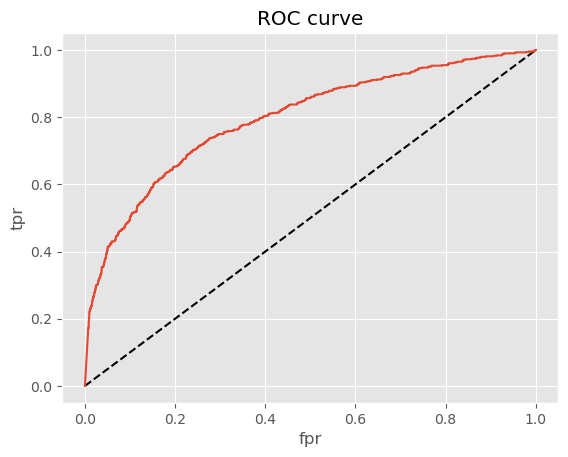

In [110]:
from sklearn.metrics import roc_curve
y_pred_proba = classifier.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [112]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7955433864958871